# Homework 5 writeup solutions

## Name: Dylan Renard

## Problem 1

You are going to need to load in your data again. Do that in the cell below.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
##################### Coding Problem 1 ##########################
## Part a - Load in the data
# The data is called 'CO2_data.csv'
data = np.genfromtxt("CO2_data.csv", delimiter = ",") 

# Once you have M defined from CO2_data, uncomment the 
# following code to define t and CO2
t = data[:, 0]
CO2 = data[:, 1]
A1 = t
A2 = CO2

## (b)
# Define the error function that calculates the sum of squared error.
# I've started this for you, but you need to fill it in and uncomment. 
def sumSquaredError(a,b,r):
   # Define the model y
   y = lambda t: a + b*np.exp(r*t)
   # Compute the error using sum-of-squared error
   return np.sum((y(t) - CO2)**2)

# Check the error function by defining A3
A3 = sumSquaredError(300,30,0.03)
## (c)
# We need an adapter function to make this work with scipy.optimize.fmin
# Uncomment the line below to use the adapter function
adapter = lambda p: sumSquaredError(p[0], p[1], p[2])

# Once adapter is defined, use fmin
# We use the following guess
guess = np.array([300, 30, 0.03])

A4 = scipy.optimize.fmin(adapter,guess, maxiter=2000)


## (d)
# Once we have found the optimal parameters, 
# find the error for those optimal parameters
A5 = adapter(A4)


## (e)
# Now we do the same thing except with max error. 
# Your function looks similar, except use the max error
def maxError(a,b,r):
   # Define the model y
   y = lambda t: a + b*np.exp(r*t)
   # Compute the error using sum-of-squared error
   return  np.amax(np.abs(y(t) - CO2))


adapter_max = lambda p: maxError(p[0], p[1], p[2])
A6 = maxError(300,30,0.03)
A7 = scipy.optimize.fmin(adapter_max, guess, maxiter=2000) 

## (f)
# This error function has more inputs, but it's the same idea.
# Make sure to use sum of squared error!
def sumSquaredError2(a,b,r,c,d,e):
   # Define the model y
   y = lambda t: a + b*np.exp(r*t) + c *np.sin(d*(t - e)) 
   # Compute the error using sum-of-squared error
   return sum(np.abs(y(t) - CO2)**2)

A8 = sumSquaredError2(300, 30, 0.03,-5,4,0)

## (g)
adapter2 = lambda p: sumSquaredError2(p[0], p[1], p[2], p[3], p[4], p[5])
initial_guess = np.array([A4[0], A4[1], A4[2], -5, 4, 0])
best_guess = scipy.optimize.fmin(adapter2, initial_guess, maxiter=20000)
A9 = best_guess

# And we need to make a new adapter function
# Again, this will have more inputs but will look pretty similar. 

## (h)
# Once we have found the optimal parameters, find the associated error.
A10 = sumSquaredError2(best_guess[0], best_guess[1], best_guess[2], best_guess[3], best_guess[4], best_guess[5])


Optimization terminated successfully.
         Current function value: 3861.342588
         Iterations: 140
         Function evaluations: 248
Optimization terminated successfully.
         Current function value: 5.145382
         Iterations: 514
         Function evaluations: 922
Optimization terminated successfully.
         Current function value: 710.242620
         Iterations: 1091
         Function evaluations: 1676


### Part a - plot

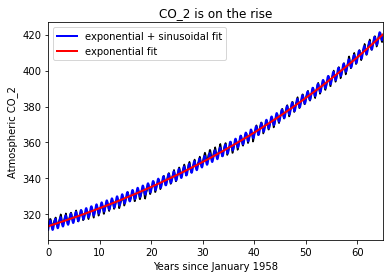

In [10]:
range_of_time = np.linspace(0, 65, 2000)
A9_equation = lambda t: A9[0]+A9[1]*np.exp(A9[2]*t)+A9[3]*np.sin(A9[4]*(t-A9[5]))
A4_equation = lambda t: A4[0]+A4[1]*np.exp(t*A4[2])
fig1 = plt.figure('Figure 1')
plt.plot(t, CO2, '-k', markersize = 2)
plt.plot(range_of_time, A9_equation(range_of_time), '-b', linewidth = 2, label = 'exponential + sinusoidal fit')
plt.plot(range_of_time, A4_equation(range_of_time), '-r', linewidth = 2, label = 'exponential fit')
plt.xlabel('Years since January 1958')
plt.ylabel('Atmospheric CO_2')
plt.xlim(0, 65)
plt.title('CO_2 is on the rise')
plt.legend()
plt.show()

### Part b - Discussion of error
The error recorded for the exponential curve model is approximately 3861.34258.
The error recorded for the exponential and sinusoidal fit is 710.65494. 
Comparing the models plotted, it is also clear visaully that the blue model (exponential + sinusoidal) has a smaller error than the black model (exponential only) with it's lower levels of osilation from the red line (true value).

Any residual error from both models may be explained by the red line (true value) only demonstrating increasing behavior, whereas the both models try to over self correct resulting oscillating behavior.

### Part c - Prediction

To predict the CO2 in 2023, I can use the exponential and sinusoidal model since it will lead to a smaller error when compared to just exponential.

## Problem 2

We'll need to load in the Salmon data again. Do that below.

In [11]:
######################### Coding problem 2 ###################
## Part (a)
M = np.genfromtxt('salmon_data.csv', delimiter=',')

year = M[:,0] #Assign the 'year' array to the first column of the data
salmon = M[:,1] #Assign the 'salmon' array to the first column of the data

## (b) - Degree-1 polynomial
first_degree_p = np.polyfit(year, salmon, 1)
A11 = first_degree_p
p0 = lambda x: first_degree_p[0]*x + first_degree_p[1]
## (c) - Degree-3 polynomial
third_degree_p = np.polyfit(year, salmon, 3)
A12 = third_degree_p
p1 = lambda x: third_degree_p[0]*x**3 + third_degree_p[1]*x**2 + third_degree_p[2]*x +third_degree_p[3]

## (d) - Degree-5 polynomial
fifth_degree_p = np.polyfit(year,salmon,5)
A13 = fifth_degree_p
p2 = lambda x: fifth_degree_p[0]*x**5 + fifth_degree_p[1]*x**4 + fifth_degree_p[2]*x**3 +  + fifth_degree_p[3]*x**2 + fifth_degree_p[4]*x +fifth_degree_p[5] 

## (e) - compare to exact number of salmon
exact =  752638 # The exact number of salmon
first_d_err = np.abs(p0(2022)- exact)/exact
third_d_err = np.abs(p1(2022)- exact)/exact
fifth_d_err = np.abs(p2(2022)- exact)/exact

A14 = [first_d_err,third_d_err,fifth_d_err]

### Part a - plot

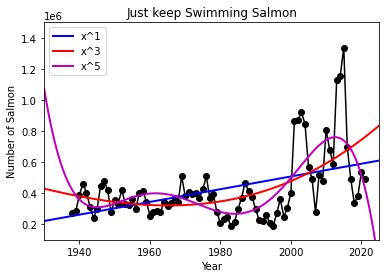

712512.5765549624 1458352.5282149315 -17028204.0625


In [12]:
xrange = np.linspace(1930, 2025, 2000)
plt.plot(year, salmon, '-ok')
plt.plot(xrange, p0(xrange), '-b', linewidth = 2, label = 'x^1')
plt.plot(xrange, p1(xrange), '-r', linewidth = 2, label = 'x^3')
plt.plot(xrange, p2(xrange), '-m', linewidth = 2, label = 'x^5')
plt.xlim(1930, 2025)
plt.ylim(100000, 1500000)
plt.xlabel('Year')
plt.ylabel('Number of Salmon')
plt.title('Just keep Swimming Salmon')
plt.legend()
plt.show()
print(p0(2050), p1(2050), p2(2050))


### Part b - Line of best fit discussion
Presented are 2 best fit lines that show the salmon population increasing in the future: first order and third order).  The fifth order line shows that the salmon population will decrease going into the future. 
The slope that best shows the salmon population trend over the fixed timeframe is the third order line of fit because it shows increasing as well as decreasing of the population.  

### Part c - Accuracy of predictions
I am confident that the most accurate salmon population prediction for 2022 with a 3.5% error which is the blue line, the third order fit.
The prediction that was the least accurate was the fifth order fit with 55% error from the true value for 2022.  

### Part d - Predicting Salmon populations in 2050
If I wanted to predict the 2050 salmon population, I would use the third order fit model.
This is based on calculating the predicted 2050 populations from each model.

#### 2050 estimates shown below
*First order estimate: 712,512 salmon

*Third order estimante: 1,458,352 salmon

*Fifth order estimate: -17028204 salmon

The first order one at 712,512 salmon seems like a vast underestimate given our data.
Also the fifth order one at -17,028,204 suggests that the salmon will be extinct by then but from the current trend
that does not appear to be the case because this model does not follow the up and down trend of the population.

For these reasons I would use the third order estimate. A better prediction may involve incorporating the sinusoidal model to generate more accurate results. 